### Project 2: Avocado Price Prediction using Machine Learning

Author: Barbara Jean

Date: 07/21/2024

output: pdf_document

In [36]:
# Handling warnings as errors 
import warnings
warnings.filterwarnings("ignore")

In [2]:
# Importing the necessary libraries 
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import statistics
import scipy.stats as st
from sklearn.model_selection import train_test_split
from sklearn.feature_selection import SelectKBest
from sklearn.metrics import r2_score, mean_squared_error
from sklearn.metrics import mean_squared_error
from math import sqrt
from sklearn.metrics import accuracy_score, confusion_matrix
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import LabelEncoder,OneHotEncoder
from sklearn.preprocessing import OrdinalEncoder
from sklearn import preprocessing
from sklearn.metrics import accuracy_score
import xgboost as xgb
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import DecisionTreeRegressor
from pandas.plotting import autocorrelation_plot
from statsmodels.tsa.arima.model import ARIMA
from pandas import datetime
from statsmodels.tsa.stattools import adfuller
from pandas.plotting import autocorrelation_plot
from statsmodels.graphics.tsaplots import plot_acf,plot_pacf 
import statsmodels.api as sm
from matplotlib import pyplot
from pandas.plotting import lag_plot
from statsmodels.tsa.ar_model import AutoReg
from pandas import DataFrame


In [3]:
# Reading dataset
data=pd.read_csv("C:/Users/79bar/dsc_680/avocado.csv")
avocados=pd.DataFrame(data)
print("The loading of the dataset was successful.\n")

The loading of the dataset was successful.



In [4]:
avocados.head() # Reading the first records by using the head() metho

,Unnamed: 0,Date,Average Price,TotalVolume,Plu4046,Plu4225,Plu4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region
0,0,12/27/2015,1.33,64236.62,1036.74,54454.85,48.16,8696.87,8603.62,93.25,0.0,conventional,2015,Albany
1,1,12/20/2015,1.35,54876.98,674.28,44638.81,58.33,9505.56,9408.07,97.49,0.0,conventional,2015,Albany
2,2,12/13/2015,0.93,118220.22,794.70,109149.67,130.50,8145.35,8042.21,103.14,0.0,conventional,2015,Albany
3,3,12/6/2015,1.08,78992.15,1132.00,71976.41,72.58,5811.16,5677.40,133.76,0.0,conventional,2015,Albany
4,4,11/29/2015,1.28,51039.60,941.48,43838.39,75.78,6183.95,5986.26,197.69,0.0,conventional,2015,Albany


### Data exploration

In [5]:
avocados.shape # Returning a tuple representing the dimensionality of the DataFrame

(18249, 14)

In [6]:
avocados.size # Returning an int representing the number of elements in this object

255486

In [7]:
avocados.info() # Printing a summary of the dataframe, index dtype and columns, non-null values

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18249 entries, 0 to 18248
Data columns (total 14 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Unnamed: 0     18249 non-null  int64  
 1   Date           18249 non-null  object 
 2   Average Price  18249 non-null  float64
 3   TotalVolume    18249 non-null  float64
 4   Plu4046        18249 non-null  float64
 5   Plu4225        18249 non-null  float64
 6   Plu4770        18249 non-null  float64
 7   Total Bags     18249 non-null  float64
 8   Small Bags     18249 non-null  float64
 9   Large Bags     18249 non-null  float64
 10  XLarge Bags    18249 non-null  float64
 11  type           18249 non-null  object 
 12  year           18249 non-null  int64  
 13  region         18249 non-null  object 
dtypes: float64(9), int64(2), object(3)
memory usage: 1.9+ MB


In [8]:
avocados.dtypes.unique()

array([dtype('int64'), dtype('O'), dtype('float64')], dtype=object)

In [9]:
avocados.describe() # looking at the statistical summary of the variables with describe()

,Unnamed: 0,Average Price,TotalVolume,Plu4046,Plu4225,Plu4770,Total Bags,Small Bags,Large Bags,XLarge Bags,year
count,18249.000000,18249.000000,1.824900e+04,1.824900e+04,1.824900e+04,1.824900e+04,1.824900e+04,1.824900e+04,1.824900e+04,18249.000000,18249.000000
mean,24.232232,1.405978,8.506440e+05,2.930084e+05,2.951546e+05,2.283974e+04,2.396392e+05,1.821947e+05,5.433809e+04,3106.426507,2016.147899
std,15.481045,0.402677,3.453545e+06,1.264989e+06,1.204120e+06,1.074641e+05,9.862424e+05,7.461785e+05,2.439660e+05,17692.894652,0.939938
min,0.000000,0.440000,8.456000e+01,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000,2015.000000
25%,10.000000,1.100000,1.083858e+04,8.540700e+02,3.008780e+03,0.000000e+00,5.088640e+03,2.849420e+03,1.274700e+02,0.000000,2015.000000
50%,24.000000,1.370000,1.073768e+05,8.645300e+03,2.906102e+04,1.849900e+02,3.974383e+04,2.636282e+04,2.647710e+03,0.000000,2016.000000
75%,38.000000,1.660000,4.329623e+05,1.110202e+05,1.502069e+05,6.243420e+03,1.107834e+05,8.333767e+04,2.202925e+04,132.500000,2017.000000
max,52.000000,3.250000,6.250565e+07,2.274362e+07,2.047057e+07,2.546439e+06,1.937313e+07,1.338459e+07,5.719097e+06,551693.650000,2018.000000


### Data cleaning

#### Convert strings to lower or proper case

In [10]:
# Declararing clean_headers function to clean columns names in data set
def clean_headers(val):
    if isinstance(val,str):
        val="".join(char for char in val if char.isalnum() or char in (" ","_"))
        val=val.strip().lower().replace(" ","_")
        return val
    else:
        return val


In [11]:
# Calling clean_headers function 
avocados= data.rename(columns=clean_headers)
avocados.head()

,unnamed_0,date,average_price,totalvolume,plu4046,plu4225,plu4770,total_bags,small_bags,large_bags,xlarge_bags,type,year,region
0,0,12/27/2015,1.33,64236.62,1036.74,54454.85,48.16,8696.87,8603.62,93.25,0.0,conventional,2015,Albany
1,1,12/20/2015,1.35,54876.98,674.28,44638.81,58.33,9505.56,9408.07,97.49,0.0,conventional,2015,Albany
2,2,12/13/2015,0.93,118220.22,794.70,109149.67,130.50,8145.35,8042.21,103.14,0.0,conventional,2015,Albany
3,3,12/6/2015,1.08,78992.15,1132.00,71976.41,72.58,5811.16,5677.40,133.76,0.0,conventional,2015,Albany
4,4,11/29/2015,1.28,51039.60,941.48,43838.39,75.78,6183.95,5986.26,197.69,0.0,conventional,2015,Albany


#### Identify missing data


In [12]:
avocados.isnull().any() # Checking missing data

unnamed_0        False
date             False
average_price    False
totalvolume      False
plu4046          False
plu4225          False
plu4770          False
total_bags       False
small_bags       False
large_bags       False
xlarge_bags      False
type             False
year             False
region           False
dtype: bool

In [13]:
avocados.isnull().sum() # Detecting missing value using interger

unnamed_0        0
date             0
average_price    0
totalvolume      0
plu4046          0
plu4225          0
plu4770          0
total_bags       0
small_bags       0
large_bags       0
xlarge_bags      0
type             0
year             0
region           0
dtype: int64

#### Find outliers

**Outliers for average_price variable**

Outliers are the extreme values found in a dataset when exploring it. This indicates that the outlier data points deviate significantly from the predicted values, either being noticeably larger or
smaller. Creating plot is one of the quickest way to detect outliers

Using describe() gives descriptive statistics those that, excluding NaN values, summarize the central tendency, dispersion, and shape of the distribution of a dataset

In [14]:
avocados.average_price.describe() # Looking at descriptive statistics for 'average_price'

count    18249.000000
mean         1.405978
std          0.402677
min          0.440000
25%          1.100000
50%          1.370000
75%          1.660000
max          3.250000
Name: average_price, dtype: float64

<AxesSubplot:xlabel='average_price'>

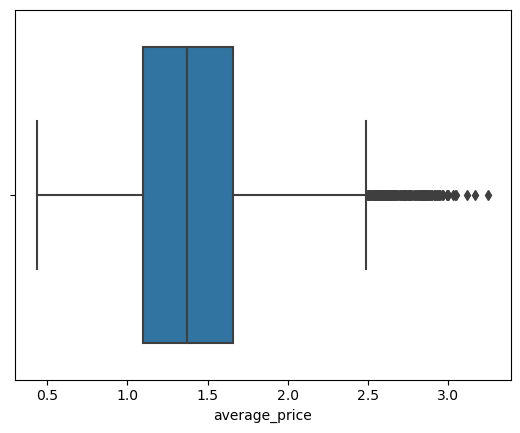

In [15]:
sns.boxplot(avocados['average_price']) # Using Box Plot for Visualization

In [16]:
# Checking the highest values where the condition is False
index=np.where(avocados.average_price==max(avocados.average_price))
avocados.average_price.loc[index]


14125    3.25
Name: average_price, dtype: float64

In [17]:
# Finding the lower quartile (Q1)
Q1_= avocados.average_price.quantile(0.25)
Q1_

1.1

In [18]:
# Finding the upper quartile (Q3) 
Q3_= avocados.average_price.quantile(0.75)
Q3_

1.66

In [19]:
# Finding interquartile range(IQR)
IQR= Q3_-Q1_
IQR

0.5599999999999998

In [20]:
# Finding the lower limit
lower_limit=Q1_-1.5*IQR
lower_limit

0.26000000000000034

In [21]:
# Finding the upper limit
upper_limit=Q3_+1.5*IQR
upper_limit

2.4999999999999996

#### Deal with Outliers

In [22]:
# Using operators | to filter out outliers
avocados[(avocados.average_price<lower_limit/(avocados.average_price>upper_limit))]

,unnamed_0,date,average_price,totalvolume,plu4046,plu4225,plu4770,total_bags,small_bags,large_bags,xlarge_bags,type,year,region
0,0,12/27/2015,1.33,64236.62,1036.74,54454.85,48.16,8696.87,8603.62,93.25,0.0,conventional,2015,Albany
1,1,12/20/2015,1.35,54876.98,674.28,44638.81,58.33,9505.56,9408.07,97.49,0.0,conventional,2015,Albany
2,2,12/13/2015,0.93,118220.22,794.70,109149.67,130.50,8145.35,8042.21,103.14,0.0,conventional,2015,Albany
3,3,12/6/2015,1.08,78992.15,1132.00,71976.41,72.58,5811.16,5677.40,133.76,0.0,conventional,2015,Albany
4,4,11/29/2015,1.28,51039.60,941.48,43838.39,75.78,6183.95,5986.26,197.69,0.0,conventional,2015,Albany
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18244,7,2/4/2018,1.63,17074.83,2046.96,1529.20,0.00,13498.67,13066.82,431.85,0.0,organic,2018,WestTexNewMexico
18245,8,1/28/2018,1.71,13888.04,1191.70,3431.50,0.00,9264.84,8940.04,324.80,0.0,organic,2018,WestTexNewMexico
18246,9,1/21/2018,1.87,13766.76,1191.92,2452.79,727.94,9394.11,9351.80,42.31,0.0,organic,2018,WestTexNewMexico
18247,10,1/14/2018,1.93,16205.22,1527.63,2981.04,727.01,10969.54,10919.54,50.00,0.0,organic,2018,WestTexNewMexico


In [23]:
# Using operators & to filter out outliers
avocados1=avocados[(avocados.average_price> lower_limit)&(avocados.average_price<upper_limit)]

<AxesSubplot:xlabel='average_price'>

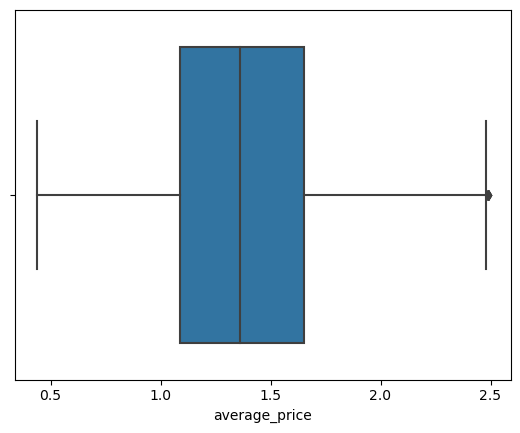

In [24]:
sns.boxplot(avocados1['average_price']) # Using Box Plot for Visualization without outliers

#### Find duplicates

The duplicated() method returns a Series with True and False values to show which rows in the DataFrame are duplicated and which are not. By default, if all the values in a row are the same, duplicated() considers the entire row as a duplicate. The method also considers the first occurrence of a row as unique, so it will always return False for the initial row, as a duplicate row won't appear until a subsequent occurrence.

In [25]:
avocados1.duplicated() # Finding duplicate value in the data 

0        False
1        False
2        False
3        False
4        False
         ...  
18244    False
18245    False
18246    False
18247    False
18248    False
Length: 18040, dtype: bool

In [26]:
# Drop the index column if it's not needed
avocados1= avocados1.drop(columns=["unnamed_0"])

### Data visualization

array([[<AxesSubplot:title={'center':'average_price'}>,
        <AxesSubplot:title={'center':'totalvolume'}>,
        <AxesSubplot:title={'center':'plu4046'}>],
       [<AxesSubplot:title={'center':'plu4225'}>,
        <AxesSubplot:title={'center':'plu4770'}>,
        <AxesSubplot:title={'center':'total_bags'}>],
       [<AxesSubplot:title={'center':'small_bags'}>,
        <AxesSubplot:title={'center':'large_bags'}>,
        <AxesSubplot:title={'center':'xlarge_bags'}>],
       [<AxesSubplot:title={'center':'year'}>, <AxesSubplot:>,
        <AxesSubplot:>]], dtype=object)

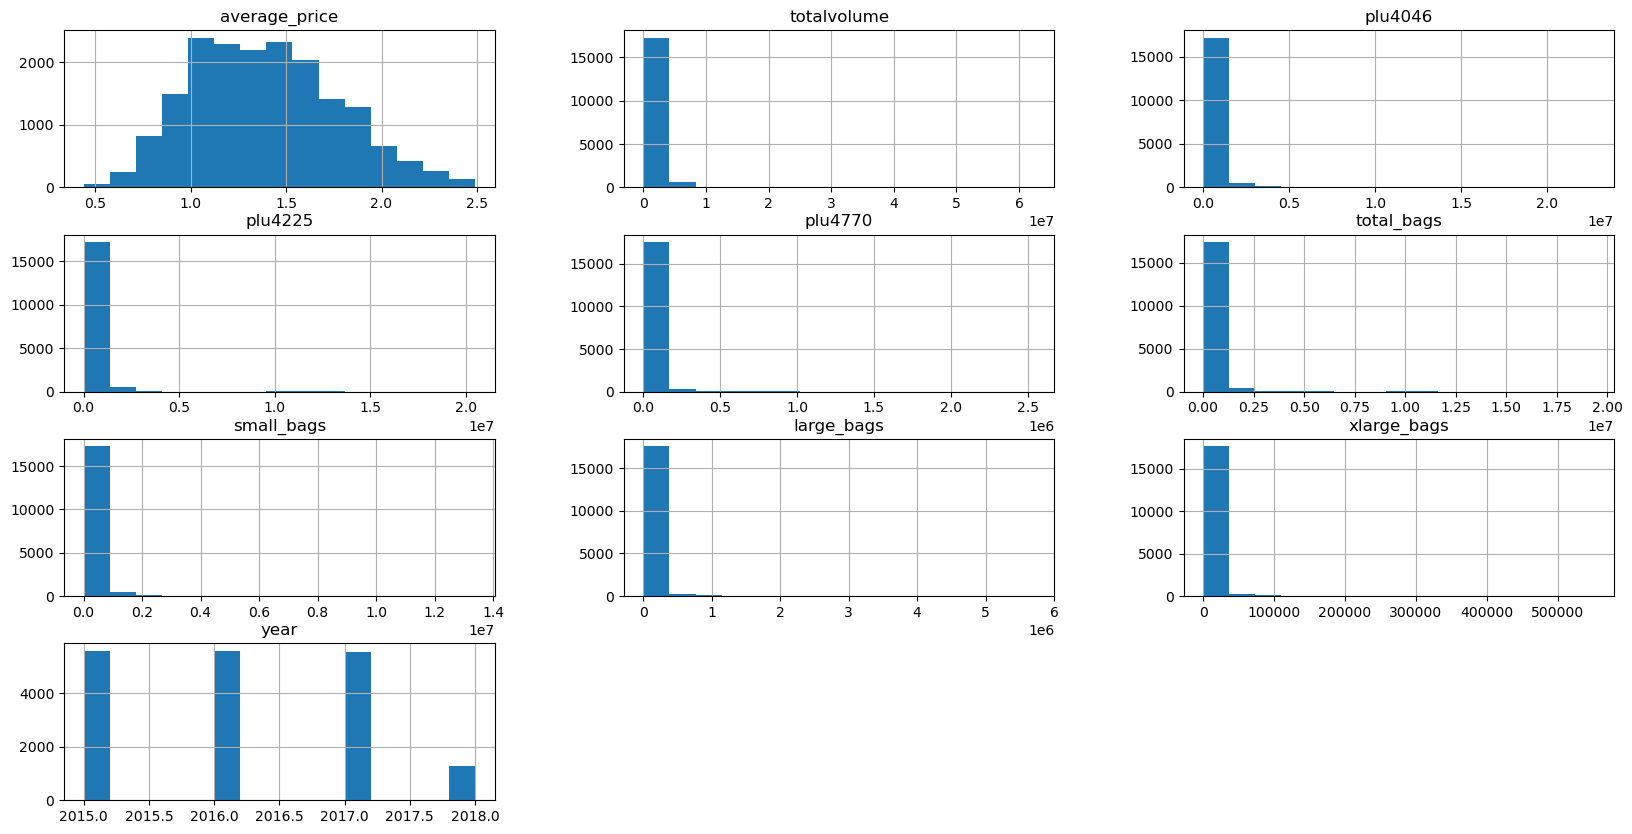

In [27]:
# Hist plots the values and their frequencies as a bar graph
avocados1.hist(bins=15,figsize=(20,10))

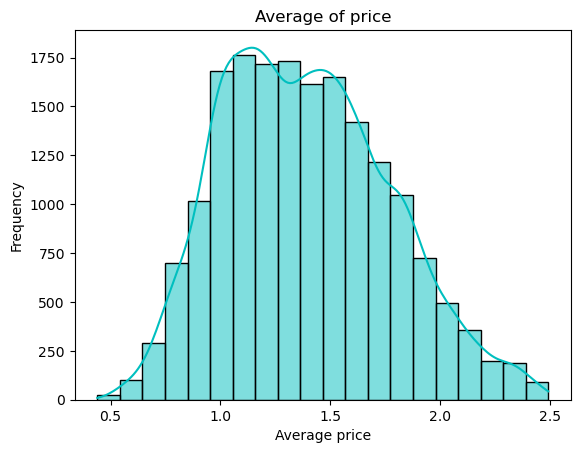

In [28]:
# Display average_price
plt.figure()
sns.histplot(avocados1['average_price'], bins=20, kde=True, color='c')
plt.title('Average of price')
plt.xlabel('Average price')
plt.ylabel('Frequency')
plt.show()

Maping avocado price

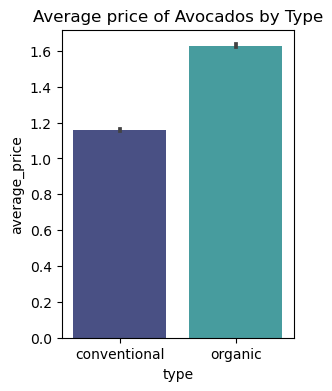

In [29]:
# Display "type" using barplot
plt.figure(figsize=(3,4))
plt.title("Average price of Avocados by Type")
sns.barplot(x="type",y="average_price",data=avocados1,palette='mako')
plt.show()

<AxesSubplot:>

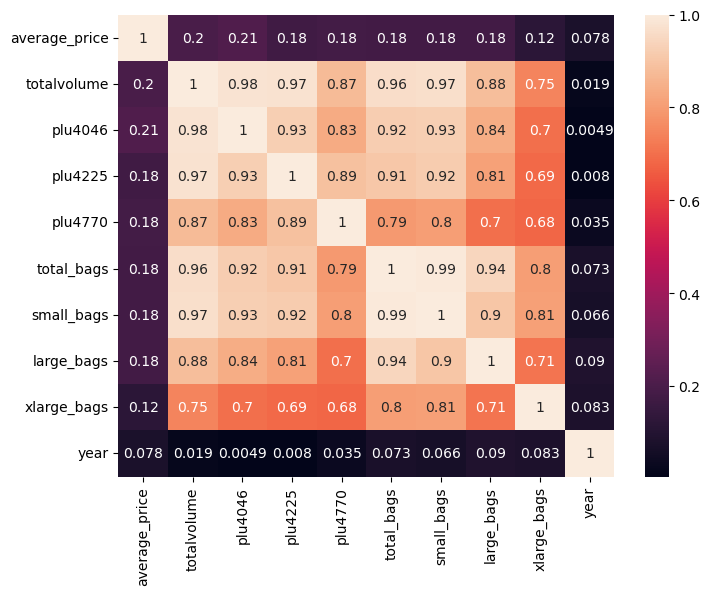

In [30]:
# Calculate the correlation matrix
corr_Mat=avocados1.corr().abs()
plt.figure(figsize=(8,6))
sns.heatmap(corr_Mat,annot=True) 

Observations on Correlation Matrix:
The features "plu4046," "plu4225," and "plu4770" show a high correlation with "Total Volume," suggesting multicollinearity. Additionally, Small Bags and "Total Bags" exhibit a high correlation, indicating potential multicollinearity.

### Performing feature engineering, particularly with date variables

In [31]:
#Convert timestamp in to time object
avocados1['date'] = pd.to_datetime(avocados1['date'])

In [32]:
# Add day, month as a feature from timestamp
avocados1['day'] =avocados1.date.dt.day
avocados1['month'] =avocados1.date.dt.month
avocados1.head()

,date,average_price,totalvolume,plu4046,plu4225,plu4770,total_bags,small_bags,large_bags,xlarge_bags,type,year,region,day,month
0,2015-12-27,1.33,64236.62,1036.74,54454.85,48.16,8696.87,8603.62,93.25,0.0,conventional,2015,Albany,27,12
1,2015-12-20,1.35,54876.98,674.28,44638.81,58.33,9505.56,9408.07,97.49,0.0,conventional,2015,Albany,20,12
2,2015-12-13,0.93,118220.22,794.70,109149.67,130.50,8145.35,8042.21,103.14,0.0,conventional,2015,Albany,13,12
3,2015-12-06,1.08,78992.15,1132.00,71976.41,72.58,5811.16,5677.40,133.76,0.0,conventional,2015,Albany,6,12
4,2015-11-29,1.28,51039.60,941.48,43838.39,75.78,6183.95,5986.26,197.69,0.0,conventional,2015,Albany,29,11


#### Creating time-series graphs for visual analysis

Text(0.5, 1.0, 'Average Price by Month')

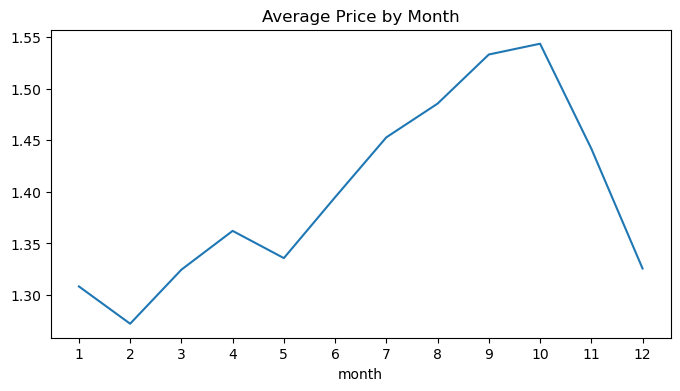

In [33]:
# displaying the average price by month
dategroup=avocados1.groupby('month').mean()
fig, ax = plt.subplots(figsize=(8,4))
ax.xaxis.set(ticks=range(0,31)) # Manually set x-ticks
dategroup['average_price'].plot(x=avocados1.month)
plt.title('Average Price by Month')

#### Encoding 'types' and 'region' variables

In [47]:
# Converting categorical data by encoding 'region' and 'type' variables
ordencod =OrdinalEncoder()
avocados1['region']=ordencod.fit_transform(avocados1['region'].values.reshape(-1,1))
avocados1['type']=ordencod.fit_transform(avocados1['type'].values.reshape(-1,1))
avocados1.head()

,date,average_price,totalvolume,plu4046,plu4225,plu4770,total_bags,small_bags,large_bags,xlarge_bags,type,year,region,day,month
0,2015-12-27,1.33,64236.62,1036.74,54454.85,48.16,8696.87,8603.62,93.25,0.0,0.0,2015,0.0,27,12
1,2015-12-20,1.35,54876.98,674.28,44638.81,58.33,9505.56,9408.07,97.49,0.0,0.0,2015,0.0,20,12
2,2015-12-13,0.93,118220.22,794.70,109149.67,130.50,8145.35,8042.21,103.14,0.0,0.0,2015,0.0,13,12
3,2015-12-06,1.08,78992.15,1132.00,71976.41,72.58,5811.16,5677.40,133.76,0.0,0.0,2015,0.0,6,12
4,2015-11-29,1.28,51039.60,941.48,43838.39,75.78,6183.95,5986.26,197.69,0.0,0.0,2015,0.0,29,11


### Building an ARIMA Model

                               SARIMAX Results                                
Dep. Variable:          average_price   No. Observations:                18040
Model:                 ARIMA(1, 1, 2)   Log Likelihood                7512.534
Date:                Wed, 17 Jul 2024   AIC                         -15017.068
Time:                        01:36:35   BIC                         -14985.867
Sample:                             0   HQIC                        -15006.809
                              - 18040                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.9206      0.003    282.762      0.000       0.914       0.927
ma.L1         -1.3191      0.006   -227.815      0.000      -1.330      -1.308
ma.L2          0.3212      0.006     56.482      0.0

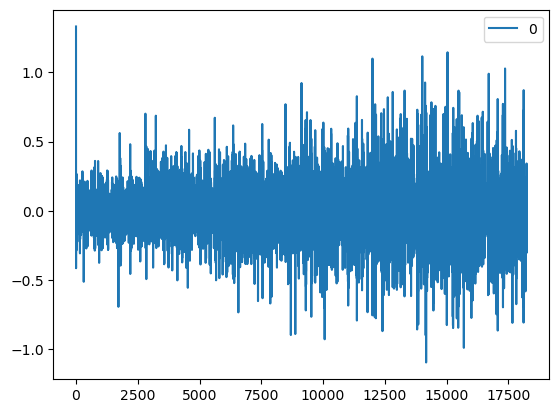

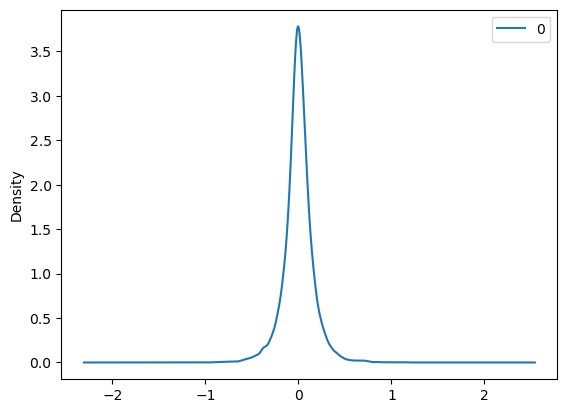

                  0
count  18040.000000
mean       0.000963
std        0.159851
min       -1.093690
25%       -0.072057
50%        0.000447
75%        0.076392
max        1.330000


In [37]:
# fit model
model = ARIMA(avocados1['average_price'], order=(1,1,2))
model_fit = model.fit()
# summary of fit model
print(model_fit.summary())
# line plot of residuals
residuals = DataFrame(model_fit.resid)
residuals.plot()
pyplot.show()
# density plot of residuals
residuals.plot(kind='kde')
pyplot.show()
# summary stats of residuals
print(residuals.describe())

In [53]:
# splitting into train and test sets
X = avocados1['average_price'].values
size = int(len(avocados1) - 15)
train, test = X[0:size], X[size:len(X)]
history = [x for x in train]
predictions = list()
# Applying the model to make a prediction
for t in range(len(test)):
 model = ARIMA(history, order=(2,1,2))
 model_fit = model.fit()
 output = model_fit.forecast()
 yhat = output[0]
 predictions.append(yhat)
 obs = test[t]
 history.append(obs)
 print('predicted=%f, expected=%f' % (yhat, obs))


predicted=1.690045, expected=1.830000
predicted=1.753839, expected=1.820000
predicted=1.775954, expected=1.480000
predicted=1.571723, expected=1.620000
predicted=1.625476, expected=1.560000
predicted=1.587859, expected=1.560000
predicted=1.573457, expected=1.540000
predicted=1.557972, expected=1.570000
predicted=1.566996, expected=1.560000
predicted=1.564770, expected=1.570000
predicted=1.566637, expected=1.630000
predicted=1.610399, expected=1.710000
predicted=1.666592, expected=1.870000
predicted=1.790816, expected=1.930000
predicted=1.857745, expected=1.620000


Test RMSE: 0.129


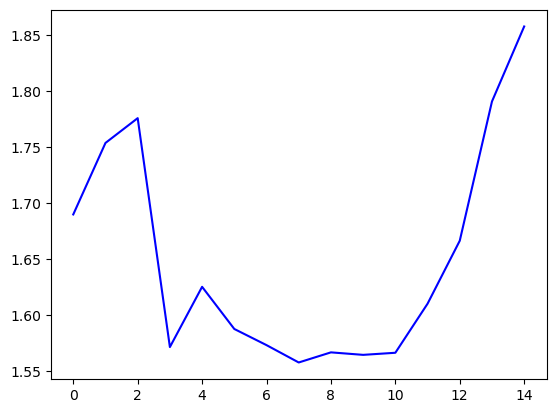

In [50]:
# evaluating forecasts
rmse = sqrt(mean_squared_error(test, predictions))
print('Test RMSE: %.3f' % rmse)
# plotting forecasts against actual outcomes
#pyplot.plot(test)
pyplot.plot(predictions, color='blue')
pyplot.show()